In [25]:
# Make imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import seaborn as sns
# import pyclustertend
import random

In [26]:
datos = pd.read_csv('Migration_Flows_from_2010_to_2019.csv')
print(datos.head())

descripcion = datos.describe()


  current_state  year  population  same_house  same_state  \
0       Alabama  2010     4729509     3987155      620465   
1        Alaska  2010      702974      565031       95878   
2       Arizona  2010     6332786     5069002     1001991   
3      Arkansas  2010     2888304     2387806      412997   
4    California  2010    36907897    30790221     5413287   

   from_different_state_Total  abroad_Total     from  number_of_people  
0                      108723         13166  Alabama                 0  
1                       36326          5739  Alabama               477  
2                      222725         39068  Alabama               416  
3                       79127          8374  Alabama              1405  
4                      444749        259640  Alabama              3364  


In [27]:
# Agrupar por estado destino, estado origen y sumar las migraciones totales
migraciones_agrupadas = datos.groupby(['current_state', 'from'])[['number_of_people']].sum()

# migraciones_agrupadas.to_csv('migraciones_agrupadas.csv')
print(migraciones_agrupadas)

                                     number_of_people
current_state from                                   
Alabama       Alabama                               0
              Alaska                            11241
              Arizona                           12448
              Arkansas                          11546
              California                        39298
...                                               ...
Wyoming       Wisconsin                          2858
              Wyoming                               0
              abroad_ForeignCountry             19635
              abroad_PuertoRico                   279
              abroad_USIslandArea                 173

[2808 rows x 1 columns]


In [28]:
# Agrupar por estado origen, anio y sumar las migraciones totales
migraciones_anuales = datos.groupby(['from', 'year'])[['number_of_people']].sum()

# migraciones_anuales.to_csv('migraciones_anuales.csv')
print(migraciones_anuales)

                          number_of_people
from                year                  
Alabama             2010             99850
                    2011            106841
                    2012            109218
                    2013             97512
                    2014            111705
...                                    ...
abroad_USIslandArea 2015             20482
                    2016             16060
                    2017             18418
                    2018             24939
                    2019             15618

[540 rows x 1 columns]


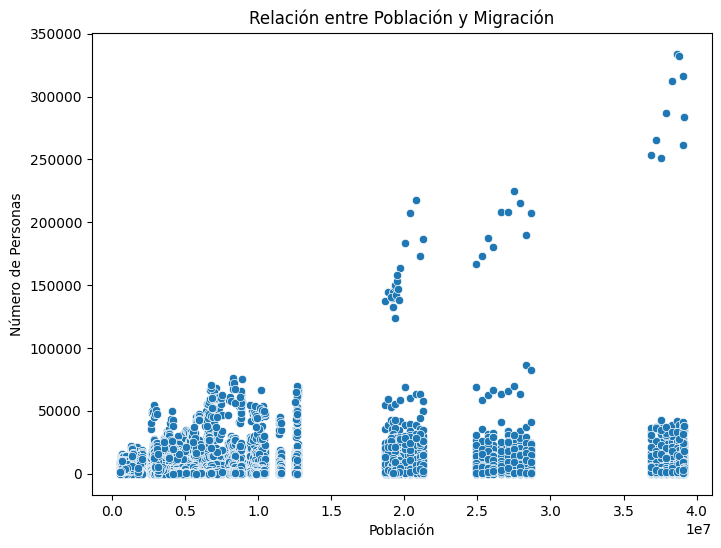

In [29]:
# Grafico entre población y migración
plt.figure(figsize=(8, 6))
sns.scatterplot(x=datos['population'], y=datos['number_of_people'])
plt.xlabel('Población')
plt.ylabel('Número de Personas')
plt.title('Relación entre Población y Migración')
plt.show()

### Minimum Wage Data
#### Análisis Exploratorio - Limpieza de datos

In [32]:
# Loading the minimum wage
df = pd.read_csv('MinimumWageData.csv', encoding="latin1")
# Rename columns
df = df.rename(columns = {"Year": "year" , "State": "current_state"})
# Filter the df to have  a range between [2010-2019]
df = df[(df['year'] < 2020) & (df['year'] > 2009)]

In [33]:
# Chequear si hay valores nulos
nan_columns = df.columns[df.isna().any()].tolist()
print(nan_columns)
print(df[df.isna().any(axis=1)])
print(len(df[df.isna().any(axis=1)]))
print(len(df))

['Department.Of.Labor.Cleaned.Low.Value.2020.Dollars', 'Department.Of.Labor.Cleaned.High.Value.2020.Dollars', 'Footnote']
      year  current_state  State.Minimum.Wage  \
2268  2010        Alabama                0.00   
2269  2010         Alaska                7.75   
2270  2010        Arizona                7.25   
2272  2010     California                8.00   
2273  2010       Colorado                7.24   
...    ...            ...                 ...   
2801  2019           Utah                7.25   
2804  2019     Washington               13.50   
2805  2019  West Virginia                8.75   
2806  2019      Wisconsin                7.25   
2807  2019        Wyoming                5.15   

      State.Minimum.Wage.2020.Dollars  Federal.Minimum.Wage  \
2268                             0.00                  7.25   
2269                             9.19                  7.25   
2270                             8.60                  7.25   
2272                             9.49

In [34]:
columnas_deseadas = ['year', 'current_state', 'State.Minimum.Wage.2020.Dollars', 'Federal.Minimum.Wage.2020.Dollars', 'Effective.Minimum.Wage.2020.Dollars']
df = df[columnas_deseadas]
print(df.head())

      year current_state  State.Minimum.Wage.2020.Dollars  \
2268  2010       Alabama                             0.00   
2269  2010        Alaska                             9.19   
2270  2010       Arizona                             8.60   
2271  2010      Arkansas                             7.41   
2272  2010    California                             9.49   

      Federal.Minimum.Wage.2020.Dollars  Effective.Minimum.Wage.2020.Dollars  
2268                                8.6                                 8.60  
2269                                8.6                                 9.19  
2270                                8.6                                 8.60  
2271                                8.6                                 8.60  
2272                                8.6                                 9.49  


### Union de base de datos MinimumWage y MigrationFlows

In [36]:
data_Frame_final = pd.merge(datos ,df, on = ["year", "current_state"])
print(data_Frame_final.head())

  current_state  year  population  same_house  same_state  \
0       Alabama  2010     4729509     3987155      620465   
1        Alaska  2010      702974      565031       95878   
2       Arizona  2010     6332786     5069002     1001991   
3      Arkansas  2010     2888304     2387806      412997   
4    California  2010    36907897    30790221     5413287   

   from_different_state_Total  abroad_Total     from  number_of_people  \
0                      108723         13166  Alabama                 0   
1                       36326          5739  Alabama               477   
2                      222725         39068  Alabama               416   
3                       79127          8374  Alabama              1405   
4                      444749        259640  Alabama              3364   

   State.Minimum.Wage.2020.Dollars  Federal.Minimum.Wage.2020.Dollars  \
0                             0.00                                8.6   
1                             9.19        